In [1]:
# Project: CN Segmentation Algorithms
# Author: 19024075 Shengmin(Tracy) Tao
# Date: 2022/04/08

In [117]:
def select_words(txt):
    '''
    :params dict_: txt for CN words
    return res: word index
    function: select words from txt, step = 1 
    '''
    res = 0
    res = [res+1 for item in txt if len(item)==1]
    return res

In [62]:
def read_dict(filepath):
    '''
    :params filepath: the path of the dictionary
    return words_dict: dictionary
    function：read file to build word dict 
    '''
    word_dict = []
    with open(path, 'r',encoding='utf-8') as f:
        line = f.readlines()
        for i in line:
            word = i.split(',')
            word_dict.append(word[0])
    return word_dict

In [4]:
def fully_seg(txt, dict_):
    '''
    完全切分:找出一段文本中的所有有意义单词
    
    '''
    word_list = []
    for i in range(len(txt)):
        for j in range(i+1, len(txt)+1):
            word = txt[i:j]
            if word in dict_:
                word_list.append(word)
    return word_list

In [98]:
def fmm(txt, dict_):
    '''
    正向最长匹配:从前往后，递增查词，优先输出更长的单词
    '''
    txtLen = len(txt) # 原句长度
    idx =0
    res = [] # segmentation result
    
    while idx < txtLen:
        ismatch = False
        for _ in range(window_size, 0, -1):
            subStr = txt[idx: idx + _]
            if subStr in dict_:
                ismatch = True
                res.append(subStr)
                idx +=1
                break
        if not ismatch:
            res.append(txt[idx])
            idx +=1
    return res
    

In [99]:
def bmm(txt, dict_):
    '''
    逆向最长匹配:从后往前，递减查词，优先输出更长的单词
    '''
    txtLen = len(txt) # 原句长度
    idx =0
    res = [] # segmentation result
    
    while idx > 0:
        ismatch = False
        for _ in range(window_size, 0, -1):
            subStr = txt[idx - _:idx]
            if subStr in dict_:
                ismatch = True
                res.append(subStr)
                idx -=1
                break
        if not ismatch:
            res.append(txt[idx-1])
            idx -=1
    res.reverse() # 列表倒序
    return res

In [122]:
def bi_mm(txt, dict_):
    '''
    双向最长匹配:
        1.同时执行正向最长匹配和逆向最长匹配，若两者的次数不同，则返回次数更少的那一个。
        2.如果相等，返回两者中单字更少的那一个。
        3.当单字数也相同时，优先返回非字典数最少的。
    '''
    forward = fmm(txt, dict_)
    backward = bmm(txt, dict_)
    res = []
    print(f"Forward Maximum Match:{forward}")
    print(f"Backward Maximum Match:{backward}")
    f_single_word = 0
    b_single_word = 0 
    # forward and backward single words count
    total_f = len(forward)
    total_g = len(backward)
    # total words in fmm / bmm
    outlier_f = 0
    outlier_b = 0
    # 定义单字相同数时，返回的优先级别，score为惩罚，优先级别：分数最小越优先
    if len(forward) != len(backward):
        # 1.同时执行正向最长匹配和逆向最长匹配，若两者的次数不同，则返回次数更少的那一个。
        # 如果相等就任意返回
        return forward if len(forward) < len(backward) else backward
    else: # 否则相等, 要考虑单字和最长匹配
        f_single_word = [f_single_word+1  for item in txt if len(item) == 1]# 统计单字数
        b_single_word = [b_single_word+1  for item in txt if len(item) == 1]
        outlier_f = [outlier_f +1 for item in txt if item not in dict_] # 统计不在字典中的字数
        outlier_b = [outlier_b +1 for item in txt if item not in dict_]
        if f_single_word != b_single_word:
             # 返回两者中单字更少的那一个。
            return forward if f_single_word < b_single_word else backward 
        else: # 如果单字数相等
            return outlier_f if outlier_f < outlier_b else backward        
            

In [148]:
import time 
import os
window_size =4
start = time.time()
path = "C:\\Users\\Tracy Tao\\Desktop\\大三下\\Natural Language Process\\funNLP-master\\data\\中文分词词库整理\\四十万可用搜狗txt词库utf8.txt"
dict_ = read_dict(path)
print(bi_mm("通用人工智能前路漫漫未来可期", dict_))
dic = ['人工','智能','未来','漫']
print(fully_seg("通用人工智能前路漫漫未来可期", dic))
end = time.time()
print('Running time: {}s'.format(str(end - start)))

Forward Maximum Match:['通', '用', '人', '工', '智', '能', '前', '路', '漫', '漫', '未', '来', '可', '期']
Backward Maximum Match:[]
[]
['人工', '智能', '漫', '漫', '未来']
Running time: 0.0746302604675293s


In [150]:
start = time.time()
path = "C:\\Users\\Tracy Tao\\Desktop\\大三下\\Natural Language Process\\funNLP-master\\data\\中文分词词库整理\\四十万可用搜狗txt词库utf8.txt"
dic = ['对外经贸','技术','合作','交流','不断','扩大']
print(bi_mm("对外经济技术合作与交流不断扩大。", dic))
print(fully_seg("对外经济技术合作与交流不断扩大。", dic))
end = time.time()
print('Running time: {}s'.format(str(end - start)))

Forward Maximum Match:['对', '外', '经', '济', '技术', '术', '合作', '作', '与', '交流', '流', '不断', '断', '扩大', '大', '。']
Backward Maximum Match:[]
[]
['技术', '合作', '交流', '不断', '扩大']
Running time: 0.0s


- 词典不太对，但是我木有了。。。
- 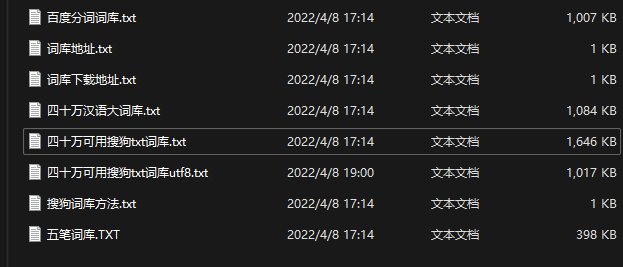
